In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-nonlinear2d-mems)

All we need to define are $\phi$ from {eq}`nonlinpdepde` for the PDE, and a trivial zero function for the boundary condition.

In [2]:
lamb = 1.5
phi = lambda x, y, u, ux, uxx, uy, uyy: uxx + uyy - lamb / (u + 1)**2
g = lambda x, y: 0

Here is the solution for $m=15$, $n=8$.

In [3]:
u = FNC.elliptic(phi, g, 15, [0, 2.5], 8, [0, 1])

print(f"solution at (2, 0.6) is {u(2, 0.6):.7f}")

solution at (2, 0.6) is -0.2264594


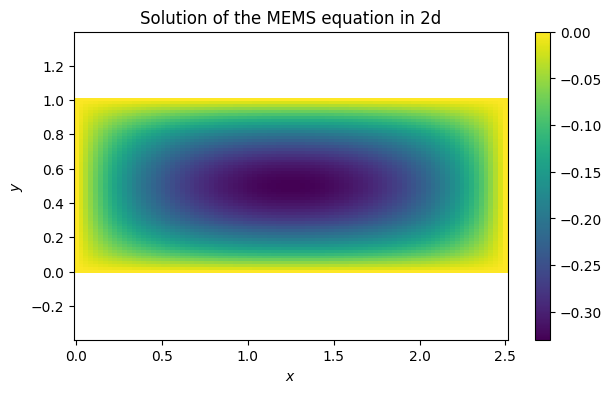

In [4]:
x = linspace(0, 2.5, 90)
y = linspace(0, 1, 60)
mtx, X, Y, _, _, _ = FNC.tensorgrid(x, y)
U = mtx(u)

pcolormesh(X.T, Y.T, U.T, cmap="viridis")
xlabel("$x$"),  ylabel("$y$"),  axis("equal")
colorbar()
title("Solution of the MEMS equation in 2d");

In the absence of an exact solution, how can we be confident that the solution is accurate? First, the Levenberg iteration converged without issuing a warning, so we should feel confident that the discrete equations were solved. We can check the boundary values easily. For example,

In [5]:
err = norm(u(x, 0) - g(x, 0), inf)
print(f"max error on bottom edge: {err:.2e}")

max error on bottom edge: 2.90e-23


Assuming that we encoded the PDE correctly, the remaining source error is truncation from the discretization. We can estimate that by refining the grid a bit and seeing how much the numerical solution changes.

In [6]:
x_test = linspace(0, 2.5, 6)
y_test = linspace(0, 1, 6)
mtx_test, X_test, Y_test, _, _, _ = FNC.tensorgrid(x_test, y_test)

with printoptions(precision=7, suppress=True):
    print(mtx_test(u))

[[ 0.         0.        -0.        -0.         0.         0.       ]
 [ 0.        -0.1479641 -0.2264594 -0.2264594 -0.1479641  0.       ]
 [ 0.        -0.1958612 -0.3059492 -0.3059492 -0.1958612  0.       ]
 [-0.        -0.1958612 -0.3059492 -0.3059492 -0.1958612  0.       ]
 [ 0.        -0.1479641 -0.2264594 -0.2264594 -0.1479641  0.       ]
 [ 0.         0.         0.         0.         0.         0.       ]]


In [7]:
u = FNC.elliptic(phi, g, 25, [0, 2.5], 14, [0, 1])
with printoptions(precision=7, suppress=True):
    print(mtx_test(u))

[[ 0.        -0.        -0.         0.         0.         0.       ]
 [-0.        -0.1479584 -0.226453  -0.226453  -0.1479584 -0.       ]
 [-0.        -0.195861  -0.3059293 -0.3059293 -0.195861  -0.       ]
 [-0.        -0.195861  -0.3059293 -0.3059293 -0.195861  -0.       ]
 [ 0.        -0.1479584 -0.226453  -0.226453  -0.1479584 -0.       ]
 [ 0.        -0.         0.        -0.        -0.         0.       ]]


The original solution seems to be accurate to about four digits.